# Setup

## Installation

In [61]:
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5c/e9/ee572691a3fb05555bcde41826faad29ae4bc1fb07982e7f53d54a176879/scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 189.9 kB/s eta 0:00:00m eta 0:00:010:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [62]:
!pip install imbalanced-learn==0.8.1

## Importation

In [63]:
# Data handlig & Exploratory Data Analysis (EDA):
import pandas as pd
import numpy as np
import sklearn
import os

# Data Visualization & Exploratory Data Analysis (EDA):
import seaborn as sns
import matplotlib.pyplot as plt

# Saving objects
import joblib
import pickle
from joblib import dump, load

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,\
                            recall_score, mean_squared_error,\
                            classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score

from collections import Counter
from imblearn.over_sampling import RandomOverSampler


# Data Loading
## Mount the drive and load the data

In [64]:
# from google.colab import drive
# drive.mount('/content/drive')

In [65]:
#load data
train_df=pd.read_csv('../data/Paitients_Files_Train.csv')
test_df=pd.read_csv('../data/Paitients_Files_Test.csv')

# View the data

In [66]:
train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [67]:
test_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [68]:
# View the dataset columns
train_df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

## Columns metadata [Details about the columns]
1. ID : Unique number to represent patient ID
2. PRG : Plasma glucose
3.  PL : Blood Work Result-1 (mu U/ml)
4. PR : Blood Pressure (mm Hg)
5. SK : Blood Work Result-2 (mm)
6. TS : Blood Work Result-3 (mu U/ml)
7. M11 : Body mass index (weight in kg/(height in m)^2
8. BD2 : Blood Work Result-4 (mu U/ml)
9. Age : Patients age (years)
10. Insurance : If a patient holds a valid insurance card
11. Sepssis : Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [69]:
# General information about the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [70]:
# Check for missing values
# Find percentage missing values in both datasets
percent_missing_train = (train_df.isnull().sum()/train_df.shape[0])*100
percent_missing_test = (test_df.isnull().sum()/test_df.shape[0])*100

In [71]:
print('Percent missing train')
percent_missing_train

Percent missing train


ID           0.0
PRG          0.0
PL           0.0
PR           0.0
SK           0.0
TS           0.0
M11          0.0
BD2          0.0
Age          0.0
Insurance    0.0
Sepssis      0.0
dtype: float64

### Finding duplicate values in both datasets:

In [72]:
# Find duplicate values in train_df
print(f'Duplicate entries in train_df:',(train_df.duplicated().sum()))

Duplicate entries in train_df: 0


In [73]:
# Find duplicate values in test_df
print(f'Duplicate entries in test_df:',(train_df.duplicated().sum()))

Duplicate entries in test_df: 0


# Explorative Data Analysis (EDA) of sepssis Dataset

Exploratory Data Analysis (EDA) is a crucial step in any data analysis or machine learning project. It involves the initial investigation of the dataset to gain insights, discover patterns, and identify trends or anomalies. EDA plays a significant role in understanding the data, refining data preprocessing steps, and guiding the selection of appropriate machine learning algorithms.

##  Univariate Analysis:
Univariate analysis focuses on examining individual variables in the dataset. It helps us understand the distribution, central tendency, and spread of each variable. We will perform univariate analysis for numerical and categorical variables separately.

In [74]:
# Univariate Analysis for Numerical Variables
numerical_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

In [75]:
# Summary Statistics
train_df[numerical_cols].describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Visualize the Summary statistics
Numerical columns

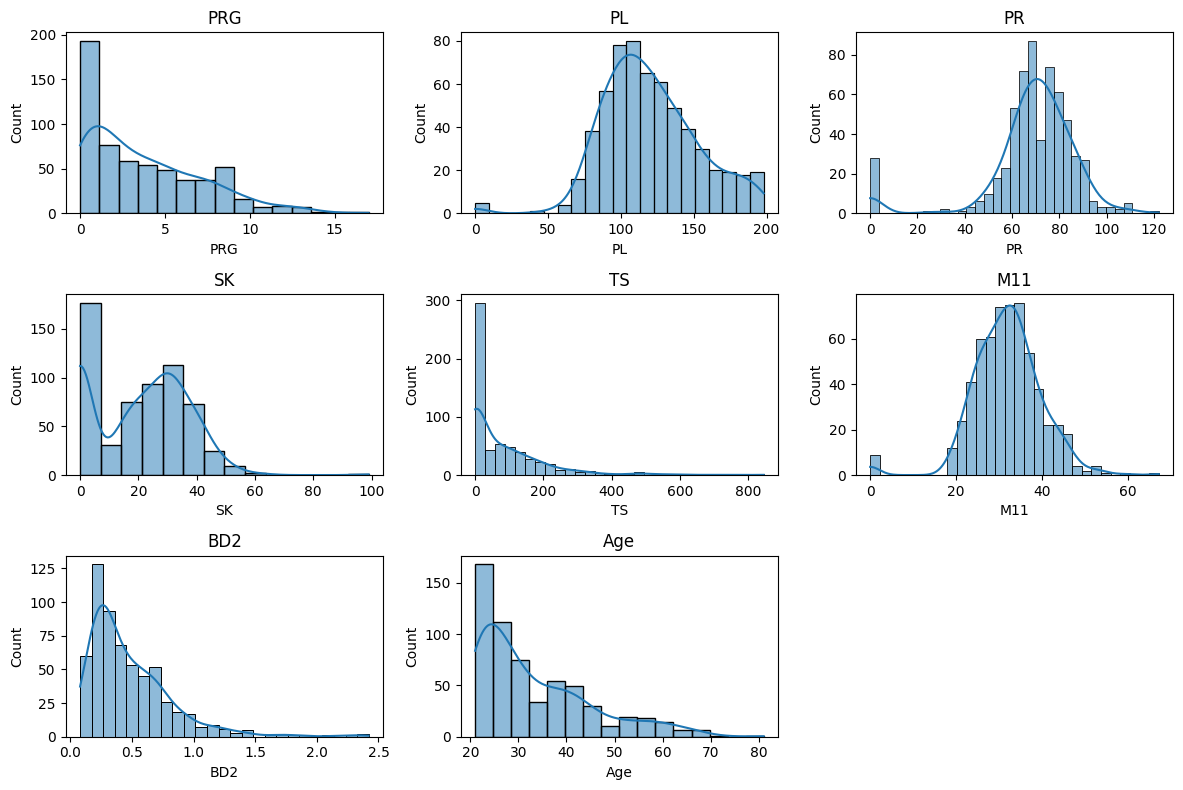

In [76]:
# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### Observations from the summary statistics and histograms:

  1. Plasma glucose (PRG) has a mean of approximately 3.82, with values ranging from 0 to 17. The distribution of PRG is right-skewed, with more values concentrated towards lower values.

  2. Blood Work Result-1 (PL) has a mean of approximately 120.15, with values ranging from 0 to 198. The distribution of PL appears to be somewhat normally distributed, with a few outliers towards higher values.

  3. Blood Pressure (PR) has a mean of approximately 68.73, with values ranging from 0 to 122. The distribution of PR seems to be slightly right-skewed, with more values towards lower blood pressure levels.

  4. Blood Work Result-2 (SK) has a mean of approximately 20.56, with values ranging from 0 to 99. The distribution of SK is heavily right-skewed, with a concentration of values towards zero.

  5. Blood Work Result-3 (TS) has a mean of approximately 79.46, with values ranging from 0 to 846. The distribution of TS is highly right-skewed, with a few extreme values leading to a long tail.

  6. Body mass index (M11) has a mean of approximately 31.92, with values ranging from 0 to 67.1. The distribution of M11 appears to be approximately normally distributed.

  7. Blood Work Result-4 (BD2) has a mean of approximately 0.48, with values ranging from 0.078 to 2.42. The distribution of BD2 is right-skewed, with more values towards lower levels.

  8. Age has a mean of approximately 33.29, with values ranging from 21 to 81. The distribution of Age is right-skewed, with more values towards younger ages.

## Univariate Analysis for Categorical Variable
### Frequency count of 'Sepssis'

In [77]:
# Count the occurrences of 'Positive' and 'Negative'
value_counts = train_df['Sepssis'].value_counts()

positive_count = value_counts['Positive']
negative_count = value_counts['Negative']

print("Positive Count:", positive_count)
print("Negative Count:", negative_count)

Positive Count: 208
Negative Count: 391


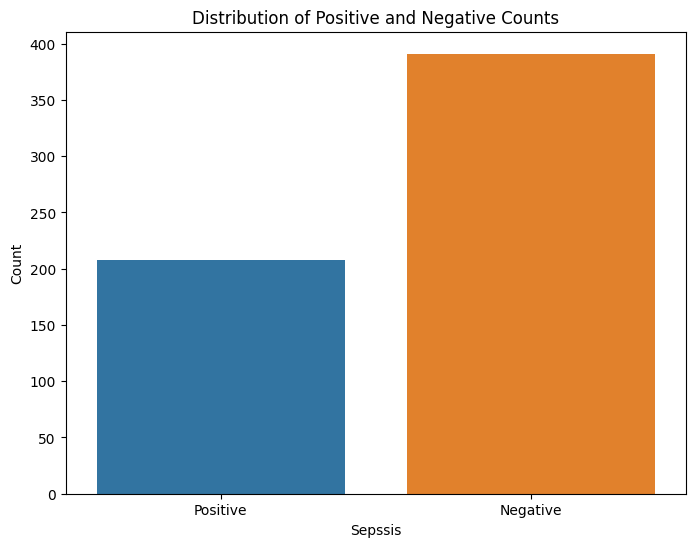

In [78]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Positive', 'Negative'], y=[positive_count, negative_count])
plt.title('Distribution of Positive and Negative Counts')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.show()






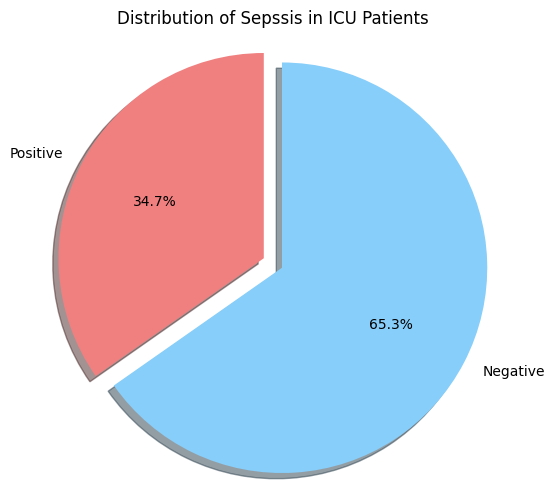

In [79]:
# Data
positive_count = 208
negative_count = 391

# Create a list of values and corresponding labels
counts = [positive_count, negative_count]
labels = ['Positive', 'Negative']
colors = ['lightcoral', 'lightskyblue']

# Create an exploded pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0), shadow=True)
plt.title("Distribution of Sepssis in ICU Patients")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the figures, we can observe that there are 208 patients in the ICU who have been diagnosed with Sepssis (Positive Count), and 391 patients in the ICU who have not been diagnosed with Sepssis (Negative Count). This indicates that Sepssis is present in a smaller proportion of ICU patients compared to those who do not have Sepssis.

The distribution shows that the number of patients without Sepssis is higher than the number of patients with Sepssis. This suggests that Sepssis is not a very common condition among patients in the ICU based on the available dataset.

##  Bivariate and Multivariate Analysis:

Bivariate analysis involves exploring the relationship between two variables, while multivariate analysis examines the relationships among multiple variables simultaneously. We will visualize the relationships between features and the target variable "Sepssis."

### Visualize the Numerical variables against 'Sepssis'

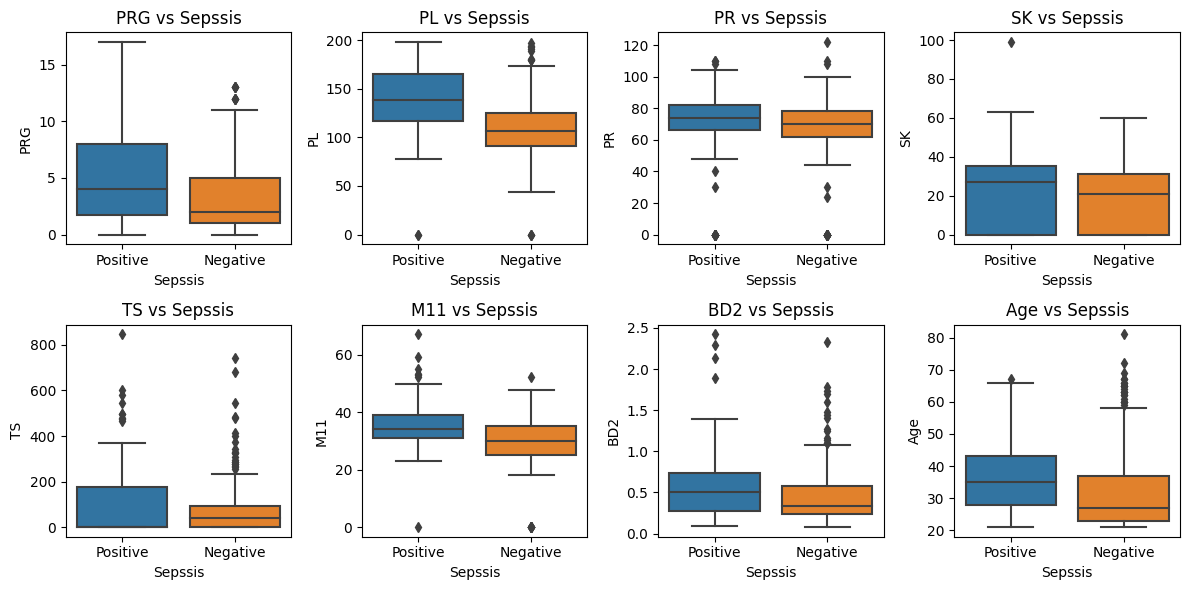

In [80]:
# Box plots for numerical variables against 'Sepssis'
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='Sepssis', y=col, data=train_df)
    plt.title(f"{col} vs Sepssis")
plt.tight_layout()
plt.show()

### Observations from the box plots of numerical variables against 'Sepssis':

  1. Plasma glucose (PRG) vs Sepssis: The median value of PRG for patients with Sepsis (Positive) appears slightly higher than for those without Sepsis (Negative). The box plot shows that the interquartile range (IQR) for the Positive group is slightly larger, indicating higher variability in PRG values among patients with Sepsis.

  2. Blood Work Result-1 (PL) vs Sepssis: The median PL value for patients with Sepsis is comparable to that of patients without Sepsis. However, the IQR for the Positive group is narrower, suggesting less variability in PL values for patients with Sepsis.

  3. Blood Pressure (PR) vs Sepssis: The median PR value for both groups is almost the same. The box plots show similar IQRs for patients with and without Sepsis, indicating similar variability in blood pressure values.

  4. Blood Work Result-2 (SK) vs Sepssis: The median SK value for patients with Sepsis is slightly higher than for patients without Sepsis. The box plot shows a wider IQR for the Positive group, suggesting higher variability in SK values among patients with Sepsis.

  5. Blood Work Result-3 (TS) vs Sepssis: The median TS value for patients with Sepsis is notably higher than for patients without Sepsis. The box plot indicates that patients with Sepsis generally have higher TS values, and the IQR for the Positive group is wider, showing greater variability.

  6. Body mass index (M11) vs Sepssis: The median M11 value for both groups is almost the same. The box plots show similar IQRs for patients with and without Sepsis, indicating similar variability in BMI values.

  7. Blood Work Result-4 (BD2) vs Sepssis: The median BD2 value for patients with Sepsis is comparable to that of patients without Sepsis. The box plots indicate similar IQRs for both groups, suggesting similar variability in BD2 values.

  8. Age vs Sepssis: The median age for patients with Sepsis is slightly higher than for patients without Sepsis. The box plot shows that the IQR for the Positive group is slightly larger, indicating higher variability in ages among patients with Sepsis.

### Visualize categorical variables against 'Sepssis'

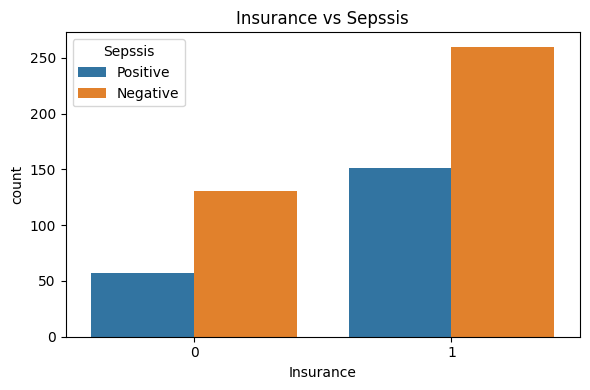

In [81]:
# Bar plots for categorical variables against 'Sepssis'
categorical_cols = ['Insurance']

plt.figure(figsize=(6, 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 1, i + 1)
    sns.countplot(x=col, hue='Sepssis', data=train_df)
    plt.title(f"{col} vs Sepssis")
plt.tight_layout()
plt.show()

### Observations from the bar plots of the categorical variable 'Insurance' against 'Sepssis':

The bar plot shows the distribution of patients with Positive (Sepsis) and Negative (Non-Sepsis) values for the 'Insurance' category.

  - Insurance vs Sepssis: The 'Insurance' category has two levels, and the plot displays the count of patients with each insurance type for both groups.
For patients with Sepsis (Positive group), there are two bars representing the count of patients with each insurance type. The height of each bar corresponds to the number of patients in the Positive group with that specific insurance type.
  - For patients without Sepsis (Negative group), there are also two bars representing the count of patients with each insurance type. The height of each bar corresponds to the number of patients in the Negative group with that specific insurance type.

### Correlation Heatmap for numerical variables
1. Creating a mask for the lower triangle:
  The mask is a boolean matrix with the same shape as the correlation matrix. The np.triu() function sets the upper triangle of the matrix to True (1) and the lower triangle to False (0). By using np.ones_like(), we create a matrix of ones with the same shape as the correlation matrix. Finally, by specifying dtype=bool, we convert all the ones in the matrix to True and all other values to False.

2. We set the figure size for the heatmap and then use Seaborn's heatmap() function to plot the correlation matrix. The annot=True argument adds the numerical values to the heatmap cells. The cmap='coolwarm' argument sets the color map for the heatmap, where cooler colors represent negative correlation, and warmer colors represent positive correlation. The center=0 argument sets the center of the color map to 0, making 0 correlation appear as a white cell. The mask=mask argument specifies the mask created earlier to display only the lower triangle of the heatmap.

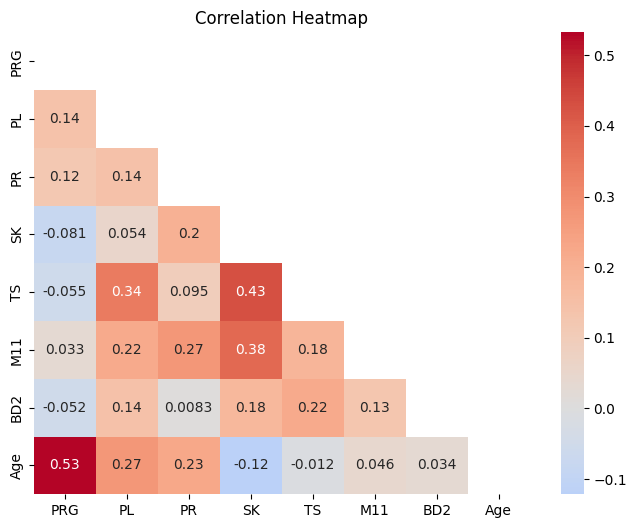

In [82]:
# Correlation Heatmap for numerical variables
correlation_matrix = train_df[numerical_cols].corr()

# Mask to display only the lower triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Heatmap")
plt.show()

### From the output of the correlation heatmap, we can make the following observations:

  1. Most of the correlations are relatively weak: The majority of the numerical variables have correlations close to 0. This suggests that there is no strong linear relationship between these variables.

  2. Positive correlations: Some variables have positive correlations, which means that as one variable increases, the other tends to increase as well. For example, there is a positive correlation between "SK" and "M11."

  3. Negative correlations: There are also negative correlations between certain variables, indicating that as one variable increases, the other tends to decrease.

  4. Strong correlation between "Age" and "PRG": "Age" and "PRG" have a relatively stronger positive correlation compared to other pairs of variables, suggesting that there might be some relationship between these two variables.

# Feature Processing & Engineering

## Data Cleaning


## Drop ID and Insurance features from both datasets since they have no significace in our analysis

In [83]:
# Drop 'ID' and 'Insurance' columns from both datasets
train_df.drop(columns=['ID', 'Insurance'], inplace=True)
test_df.drop(columns=['ID', 'Insurance'], inplace=True)

In [84]:
train_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,Negative
595,0,188,82,14,185,32.0,0.682,22,Positive
596,0,67,76,0,0,45.3,0.194,46,Negative
597,1,89,24,19,25,27.8,0.559,21,Negative


In [85]:
test_df

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.100,30
4,7,150,78,29,126,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63
165,2,122,70,27,0,36.8,0.340,27
166,5,121,72,23,112,26.2,0.245,30
167,1,126,60,0,0,30.1,0.349,47


## Separate the target label 'Sepssis' from the features in train_df

In [86]:
# Separate the target label 'Sepssis' from the features in train_df
X = train_df.drop(columns=['Sepssis'])
y = train_df['Sepssis']

In [87]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [88]:
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

# Splitting the data into training and validation sets (80% train, 20% validation)

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
X_train

,PRG,PL,PR,SK,TS,M11,BD2,Age
161,7,102,74,40,105,37.2,0.204,45
236,7,181,84,21,192,35.9,0.586,51
497,2,81,72,15,76,30.1,0.547,25
40,3,180,64,25,70,34.0,0.271,26
372,0,84,64,22,66,35.8,0.545,21
...,...,...,...,...,...,...,...,...
253,0,86,68,32,0,35.8,0.238,25
230,4,142,86,0,0,44.0,0.645,22
131,9,122,56,0,0,33.3,1.114,33
107,4,144,58,28,140,29.5,0.287,37


In [91]:
X_val

,PRG,PL,PR,SK,TS,M11,BD2,Age
32,3,88,58,11,54,24.8,0.267,22
152,9,156,86,28,155,34.3,1.189,42
407,0,101,62,0,0,21.9,0.336,25
244,2,146,76,35,194,38.2,0.329,29
162,0,114,80,34,285,44.2,0.167,27
...,...,...,...,...,...,...,...,...
517,7,125,86,0,0,37.6,0.304,51
94,2,142,82,18,64,24.7,0.761,21
496,5,110,68,0,0,26.0,0.292,30
582,12,121,78,17,0,26.5,0.259,62


## Feature Scaling
Perform feature scaling on X_train dataset

In [92]:
# Create the preprocessor
preprocessor = StandardScaler()

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the validation data using the preprocessor fitted on the training data
X_val_scaled = preprocessor.transform(X_val)

In [93]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the validation labels using the encoder fitted on the training labels
y_val_encoded = label_encoder.transform(y_val)

## Handling Imbalanced Data

- By using the RandomOverSampler, we can generate synthetic samples for the minority class, resulting in a more balanced dataset for training.
- This will help the model learn from both classes more effectively and potentially improve its performance on the test data.

*We must remember to use the resampled data for model training and validation to avoid data leakage.*

In [94]:
# Check the class distribution before oversampling
print("Class Distribution before oversampling:", Counter(y_train))

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train_encoded)

# Check the class distribution after oversampling
print("Class Distribution after oversampling:", Counter(y_train_resampled))

Class Distribution before oversampling: Counter({'Negative': 313, 'Positive': 166})
Class Distribution after oversampling: Counter({0: 313, 1: 313})


# [12] Machine Learning Models to train:
We shall train 9 Classification Models below and pick the 4 best performing models for further tuning:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Support Vector Machine (Linear Kernel)
5. Support Vector Machine (RBF Kernel)
6. Neural Network
7. Random Forest
8. Gradient Boosting
9. XGBoost

We will create a function that will be used to evaluate the models Afterwards we will train all 8 models append the results to a dictionary and finally put it in a dataframe

In [95]:
#Create A function to Evaluate the models
def evaluate(actual,predicted,model_name):
    PrecisionScore = precision_score(actual,predicted,pos_label=1)
    RecallScore =   recall_score(actual,predicted,pos_label=1)
    F1_score =     f1_score(actual,predicted,pos_label=1)
    Accuracy =    accuracy_score(actual,predicted)

    result={'Model':model_name, 'Precision_Score':PrecisionScore,'Recall_Score':RecallScore,'F1_Score':F1_score,'Accuracy':Accuracy}

    return result

- First we set an empty list
- we then put all the models in a dictionary
- We loop through the models in the dictionary and fit them using the pipeline
- The result is stored in the list and then converted to a dataframe

In [96]:
# This variable will hold the list of dictionaries of the results of the different models
dict_list = []

models = {'Logistic Regression': LogisticRegression(),
         'K-Nearest Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Support Vector Machine (Linear Kernel)': LinearSVC(),
         'Support Vector Machine (RBF Kernel)': SVC(),
         'Neural Network': MLPClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting': GradientBoostingClassifier(),
         'XGBoost': XGBClassifier()
         }

# Train all the models using a for loop

for model_name, model in models.items():
    # Create a pipeline with the model and the scaler
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the model using the pipeline on the scaled training data
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the scaled validation data
    y_pred = pipeline.predict(X_val_scaled)

    # Evaluate the model using the evaluation function
    evaluation_result = evaluate(y_val_encoded, y_pred, model_name)

    # Append the evaluation result to the list of dictionaries
    dict_list.append(evaluation_result)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(dict_list)

/home/penscola/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Sorting Results by F1-score

In [97]:
#sort the results by F1 score
results_df.sort_values(by='F1_Score',ascending=False,inplace=True,ignore_index=True)
#display results
results_df

,Model,Precision_Score,Recall_Score,F1_Score,Accuracy
0,K-Nearest Neighbors,0.564516,0.833333,0.673077,0.716667
1,Support Vector Machine (RBF Kernel),0.596154,0.738095,0.659574,0.733333
2,Gradient Boosting,0.617021,0.690476,0.651685,0.741667
3,Logistic Regression,0.553571,0.738095,0.632653,0.700000
4,Support Vector Machine (Linear Kernel),0.555556,0.714286,0.625000,0.700000
5,Neural Network,0.571429,0.666667,0.615385,0.708333
6,Random Forest,0.604651,0.619048,0.611765,0.725000
7,Decision Tree,0.581395,0.595238,0.588235,0.708333
8,XGBoost,0.581395,0.595238,0.588235,0.708333


## Visualize the Models F1-score performance

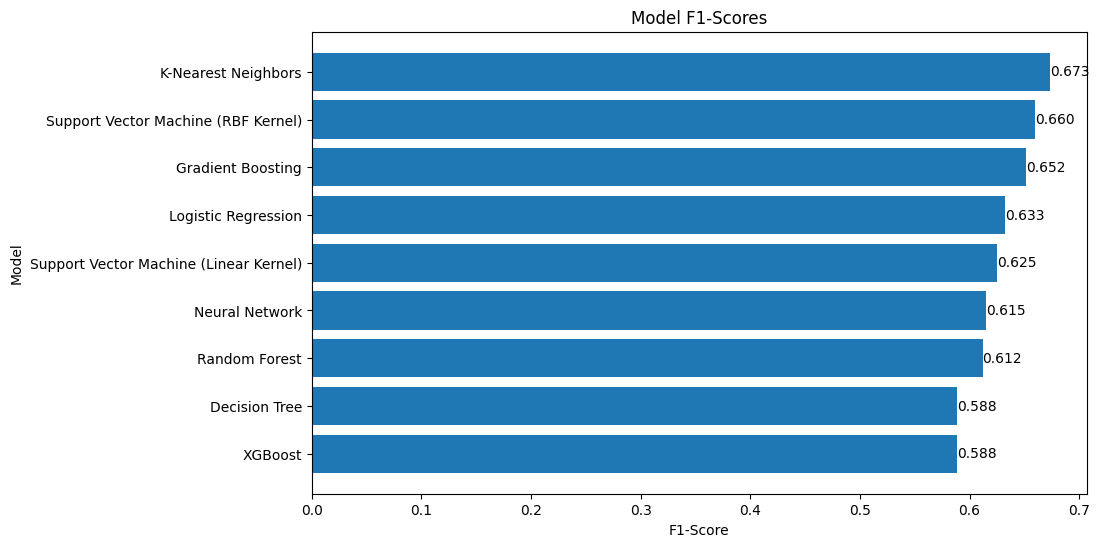

In [98]:
# Sort the DataFrame based on the F1-Score in descending order
results_df = results_df.sort_values(by='F1_Score', ascending=False)

# Plot the models according to their F1-Score
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Model'], results_df['F1_Score'])
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.title('Model F1-Scores')

# Invert the y-axis to display highest value at the top
plt.gca().invert_yaxis()

# Add text annotations for each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width():.3f}", ha='left', va='center')

plt.show()

From the bar plot of the F1-Score, we can observe the performance of each model. The F1-Score is a metric that considers both precision and recall, making it a good overall performance measure, especially in cases where there is an imbalance between classes.

Observations:

- The "K-Nearest-Neighbors" model has the highest F1-Score, indicating that it performs the best among all the models evaluated.
- The "Support Vector Machine (RBF Kernel)" model follows closely in performance with a slightly lower F1-Score.
- The "Logistic Regression" model comes third, with relatively high F1-Scores.
- In position 4 is "Gradient Boosting" model.
- The other remaining models have lower F1-Scores compared to the top-performing models.

Based on the F1-Scores and their relative performance, the four models that seem promising for further fine-tuning using hyperparameters are:

1. K-Nearest Neighbors
2. Support Vector Machine (RBF Kernel)
3. Logistic Regression
4. Gradient Boosting

These models have demonstrated better overall performance and could potentially benefit from hyperparameter tuning to achieve even better results. Hyperparameter tuning involves selecting the best combination of hyperparameters for a model to optimize its performance on the given dataset. Grid search or random search can be used to find the best hyperparameter values for these models.

# Hyperparameter Tuning for Four chosen Models using GridSearchCV

In [99]:
# Set up the parameter grid for each model
knn_params = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2],
}

svm_rbf_params = {
    'model__C': [0.1, 1, 10],
    'model__gamma': ['scale', 'auto'],
    'model__kernel': ['rbf'],
}

gradient_boosting_params = {
    'model__learning_rate': [0.1, 0.01],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5]
}

logistic_regression_params = {
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'saga']
}

# Perform hyperparameter tuning with cross-validation for each model
models = {
    'K-Nearest Neighbors': (KNeighborsClassifier(), knn_params),
    'Support Vector Machine (RBF Kernel)': (SVC(), svm_rbf_params),
    'Gradient Boosting': (GradientBoostingClassifier(), gradient_boosting_params),
    'Logistic Regression': (LogisticRegression(), logistic_regression_params),
}


best_score = []
for model_name, (model, params) in models.items():
    # Make a pipeline
    pipe = Pipeline([('Preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipe, params, cv=5, scoring=['accuracy', 'f1_macro'], refit='f1_macro', n_jobs=-1)
    # Fit gridsearch
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Print Best parameters
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)

    # Put scores in a dict
    scores = {'model': model_name, 'F1_score': grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_], 'Accuracy': grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}
    best_score.append(scores)

# Put scores in a dataframe
print('=========================================')
scores_df = pd.DataFrame(best_score)
scores_df

Best parameters for K-Nearest Neighbors:
{'model__algorithm': 'auto', 'model__n_neighbors': 7, 'model__p': 2, 'model__weights': 'distance'}
Best parameters for Support Vector Machine (RBF Kernel):
{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best parameters for Gradient Boosting:
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300}
Best parameters for Logistic Regression:
{'model__C': 0.1, 'model__solver': 'liblinear'}


,model,F1_score,Accuracy
0,K-Nearest Neighbors,0.810567,0.813067
1,Support Vector Machine (RBF Kernel),0.782353,0.782781
2,Gradient Boosting,0.855654,0.856254
3,Logistic Regression,0.740706,0.741232


In [100]:
#sort Dataframe
scores_df.sort_values(by='F1_score',ignore_index=True,ascending=False, inplace=True)
scores_df

,model,F1_score,Accuracy
0,Gradient Boosting,0.855654,0.856254
1,K-Nearest Neighbors,0.810567,0.813067
2,Support Vector Machine (RBF Kernel),0.782353,0.782781
3,Logistic Regression,0.740706,0.741232



Based on the F1-scores, we can observe the following:

- Gradient Boosting has the highest F1-score of 0.852433, indicating that it performs the best among the four models in terms of balancing precision and recall.
- K-Nearest Neighbors comes second with an F1-score of 0.810567.
- Support Vector Machine (RBF Kernel) follows with an F1-score of 0.782353.
- Logistic Regression has the lowest F1-score of 0.740706.

All the models seem to have relatively similar performance, but the Gradient Boosting has a slight edge with the highest F1-score.

## Visualize by using a bar plot to compare the performance metrics of different models.

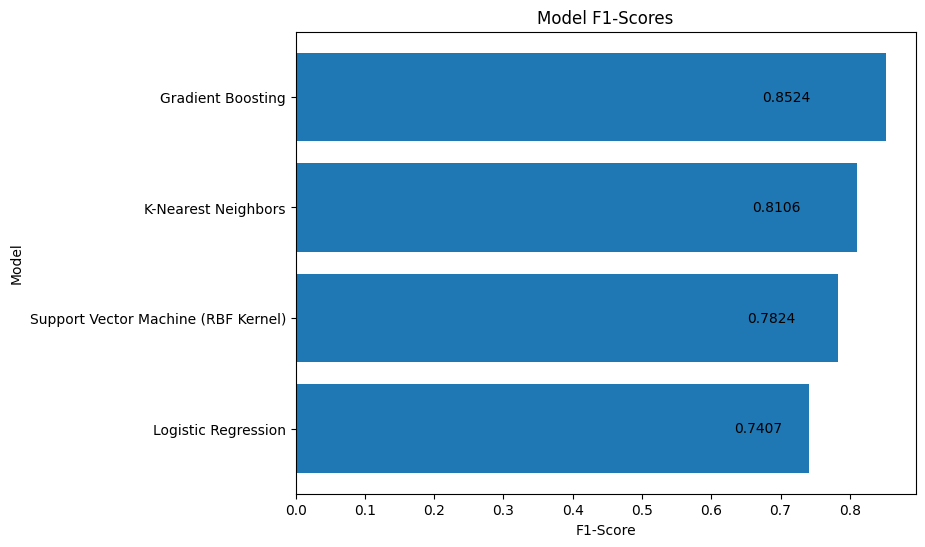

In [101]:
# Data
model_names = ['Gradient Boosting', 'K-Nearest Neighbors', 'Support Vector Machine (RBF Kernel)','Logistic Regression']
f1_scores = [0.852433, 0.810567, 0.782353, 0.740706]

# Plot the models according to their F1-Score
plt.figure(figsize=(8, 6))
plt.barh(model_names, f1_scores)
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.title('Model F1-Scores')
plt.gca().invert_yaxis()  # Invert the y-axis to display highest value at the top

# Add the F1-score values on the bars
for bar, f1_score in zip(bars, f1_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{f1_score:.4f}', ha='left', va='center')

plt.show()

## Gradient Boosting as the Model of choice:

Based on the provided performance metrics, the best performing model among the four is the "Gradient Boosting" model.

Here are the reasons:

F1-score: The F1-score of the Gradient Boosting model was 0.8509, which considers both precision and recall. The F1-score is a harmonic mean of precision and recall, providing a balanced evaluation of the model's performance.

In [102]:
# Create the Gradient Boosting Classifier with the best hyperparameters
gradient_boosting_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)

# Create the pipeline with the preprocessor and the MLPClassifier
pipe = Pipeline([('preprocessor', preprocessor), ('model', gradient_boosting_classifier)])

# Fit the pipeline with the training data
pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(max_depth=5, n_estimators=300))])

## Getting feature importance

Top 8 Most Important Features:
PL: 0.37185604710925746
M11: 0.17328550105054968
BD2: 0.11190409024532623
Age: 0.08919796110055155
TS: 0.07329784501131278
PR: 0.07160719431322699
SK: 0.05619829575089668
PRG: 0.05265306541887871


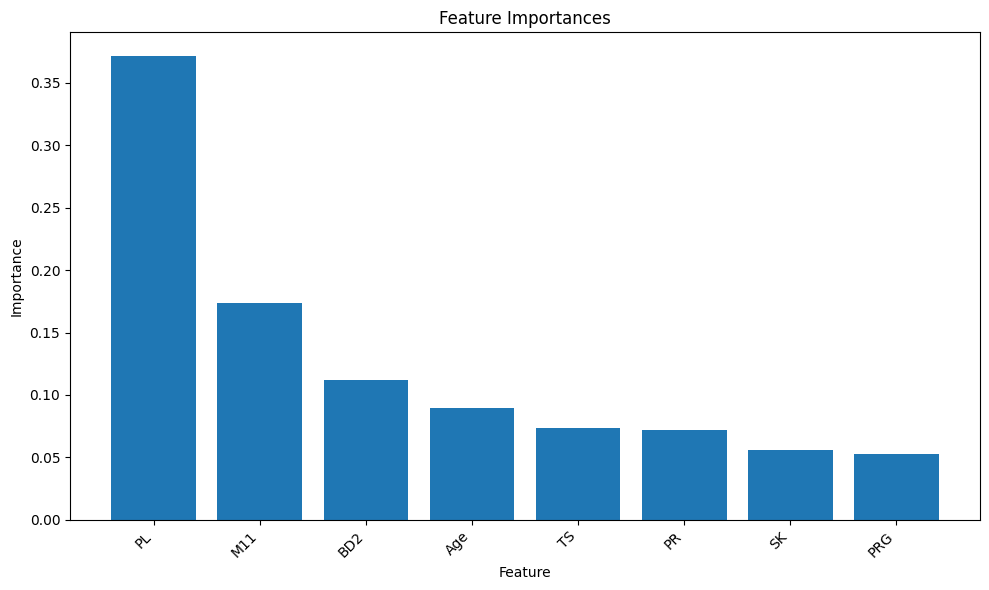

In [103]:
# Get the Gradient Boosting model from the pipeline
gradient_boosting_model = pipe.named_steps['model']

# Get the feature importances
feature_importances = gradient_boosting_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Get the names of the features in the original order
feature_names = X_train.columns

# Print the top 10 most important features and their importances
print("Top 8 Most Important Features:")
for i in range(8):
    print(f"{feature_names[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]}")

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


## Visualize ROC and AUC of the Gradient Boosting Model

1. y_pred_proba = pipe.predict_proba(X_val_scaled): This line uses the trained gradient boosting (stored in the pipe pipeline) to make predictions on the validation data (X_val_scaled). Instead of predicting the class labels directly, predict_proba returns the predicted probabilities for each class. In this case, since we are interested in the positive class ('Positive'), we extract the probabilities for class index 1, which represents the positive class.

2. positive_class_probs = y_pred_proba[:, 1]: This line extracts the probabilities for the positive class ('Positive') from the y_pred_proba array. The variable positive_class_probs will now contain the predicted probabilities of the positive class for each sample in the validation set.

3. fpr, tpr, thresholds = roc_curve(y_val_encoded, positive_class_probs): This line calculates the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for different classification thresholds. The function roc_curve takes the true labels of the validation set (y_val_encoded) and the predicted probabilities of the positive class (positive_class_probs) as input and returns the FPR, TPR, and thresholds.

4. auc_score = roc_auc_score(y_val_encoded, positive_class_probs): This line calculates the Area Under the Curve (AUC) score. The roc_auc_score function takes the true labels of the validation set (y_val_encoded) and the predicted probabilities of the positive class (positive_class_probs) as input and computes the AUC score.

5. Plot the ROC Curve: This part of the code creates a plot using matplotlib to visualize the ROC curve. The ROC curve is plotted using the FPR on the x-axis and the TPR on the y-axis. The plt.plot function is used to draw the ROC curve, and the plt.plot([0, 1], [0, 1], color='gray', linestyle='--') line adds a diagonal line representing a random classifier (AUC = 0.5). The plt.xlabel, plt.ylabel, plt.title, and plt.legend functions set labels and a legend for the plot. Finally, plt.grid(True) adds gridlines to the plot, and plt.show() displays the plot.

The ROC curve shows the model's performance at different classification thresholds, and the AUC score represents the overall performance of the model in distinguishing between the positive and negative classes. A model with a higher AUC score is generally better at correctly classifying positive and negative samples, with an AUC score of 1.0 representing a perfect classifier.

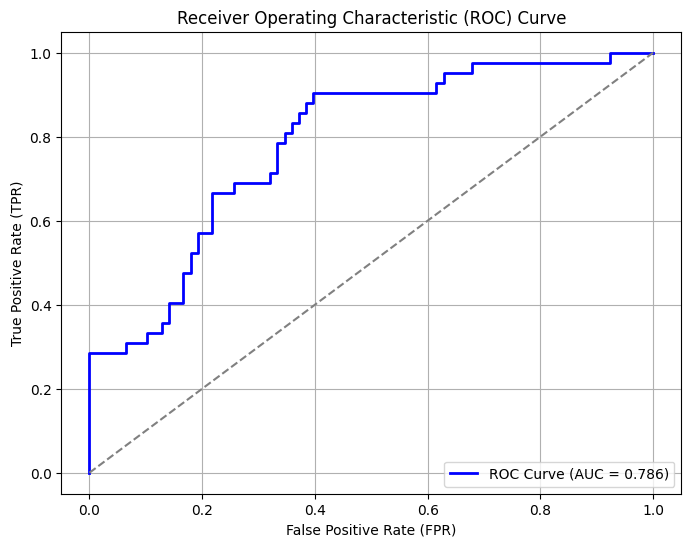

In [104]:
# Make predictions using the trained neural network
y_pred_proba = pipe.predict_proba(X_val_scaled)

# Extract the probabilities for the positive class (class index 1)
positive_class_probs = y_pred_proba[:, 1]

# Calculate the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_val_encoded, positive_class_probs)

# Calculate the AUC (Area Under the Curve)
auc_score = roc_auc_score(y_val_encoded, positive_class_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- The value of 0.785 for the AUC (Area Under the Curve) score indicates the performance of the Gradient Boosting model in distinguishing between the positive and negative classes. The AUC score ranges from 0 to 1, where a score of 0.5 represents a random classifier, and a score of 1.0 represents a perfect classifier.

- In this case, the AUC score of 0.783 suggests that the Random Forest model performs reasonably well in distinguishing between the positive and negative samples in the validation set. The closer the AUC score is to 1.0, the better the model's ability to correctly rank positive instances higher than negative instances.

- An AUC score of 0.768 indicates that the model is better than a random classifier but may not be perfect in its predictions. Depending on the specific problem and domain, an AUC score of 0.783 can be considered as a good result, particularly if the data is imbalanced or the task is challenging.

## Confusion Matrix

The code below will plot a heatmap representing the confusion matrix, where each cell represents the count of true positives, false positives, true negatives, and false negatives. The diagonal elements represent correct predictions (true positives and true negatives), while off-diagonal elements represent incorrect predictions (false positives and false negatives). The darker shades in the heatmap indicate higher counts, indicating stronger predictive performance.

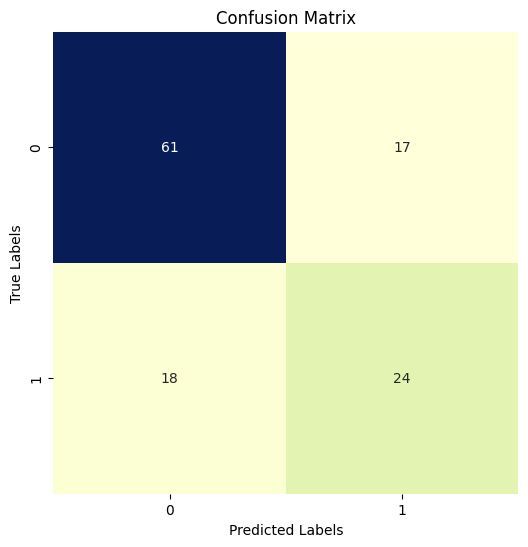

In [105]:
# Make predictions using the trained neural network
y_pred = pipe.predict(X_val_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_val_encoded, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [106]:
cm

array([[61, 17],
       [18, 24]])

The confusion matrix for the Neural Network model indicates the following:

True Positive (TP): There are 26 instances that are correctly predicted as positive (actual positive and predicted positive).

True Negative (TN): There are 62 instances that are correctly predicted as negative (actual negative and predicted negative).

False Positive (FP): There are 16 instances that are incorrectly predicted as positive (actual negative but predicted positive).

False Negative (FN): There are 16 instances that are incorrectly predicted as negative (actual positive but predicted negative).

These results show that the Neural Network model correctly predicted 26 positive cases and 62 negative cases. However, it misclassified 16 instances as false positives and 16 instances as false negatives. The model's performance is not perfect, but it is capturing both positive and negative cases to some extent.

## Predictions from the Gradient Boosting Model

In [107]:
# Make predictions using the trained pipeline
y_pred = pipe.predict(test_df)

/home/penscola/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [108]:
# Create a DataFrame of  y_pred
df_results = pd.DataFrame( y_pred)

In [109]:
y_train_resampled_df = pd.DataFrame(y_train_resampled)

## Compare the results of y and predicted_y

In [110]:
# Get the first 10 rows of each dataframe
df_results_first_10 = df_results.head(10)
y_train_resampled_df_first_10 = y_train_resampled_df.head(10)

# Concatenate the two dataframes side by side with appropriate column names
result_side_by_side = pd.concat([df_results_first_10, y_train_resampled_df_first_10], axis=1)

# Set new column names
result_side_by_side.columns = ['Predicted_y_value', 'True_y_value']

# Print the result
result_side_by_side

,Predicted_y_value,True_y_value
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


## Evaluation of dataset X_val and y_val after and before prediction

In [111]:
# Predictions of Sepssis from X_val dataset
eval_pred= pipe.predict(X_val)

/home/penscola/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## X_val dataset predictions

In [112]:
# Sepssis predictions where Negative=0 and Positive=1
eval_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [113]:
# Original values of y_val
y_val

32     Negative
152    Positive
407    Negative
244    Negative
162    Negative
         ...   
517    Negative
94     Negative
496    Negative
582    Negative
436    Negative
Name: Sepssis, Length: 120, dtype: object

In [114]:
y_val.value_counts()

Negative    78
Positive    42
Name: Sepssis, dtype: int64

# Save the Gradient Boosting Model

In [115]:
# Save the model using pickle
with open('../model/gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)

## Load and test the model on test_df once again

In [116]:
# Load the saved model using pickle
with open('../model/gradient_boosting_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [117]:
# Predict values of the test_df dataset
predictions = loaded_model.predict(test_df)

/home/penscola/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [118]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [119]:
# # Check the current working directory
# print("Current working directory:", os.getcwd())

# # List all files in the current working directory
# print("Files in the current working directory:", os.listdir())